In [73]:
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


# Show DT
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus

# Analysis
# Accuary
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score
# Confuison Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
# Precision & recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# F1 Score
from sklearn.metrics import f1_score
# Sensivitivity & Specificity
    #Use the confusion matrix
# ROC & UAC

# Clasification inform
from sklearn.metrics import classification_report

# Evaluador de los modelos

In [74]:
#Accuaracy
#Matriz de confucion
    #https://pypi.org/project/pandas-ml/
    #https://datatofish.com/confusion-matrix-python/
#Precision & recall
    #https://www.askpython.com/python/examples/precision-and-recall-in-python
#F1 Score
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
#Sensivity & spicifity
    #https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
    #Good information
#ROC curve and AUC
    #https://www.statology.org/plot-roc-curve-python/
    

#----------------------------
#extra
#Informe de clasificacion
    # https://pharos.sh/vision-general-de-los-metodos-de-clasificacion-en-python-con-scikit-learn/

#Probability Calibration curves
    #https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
    #https://dzone.com/articles/logistic-regression-vs-decision-tree#:~:text=Logistic%20Regression%20assumes%20that%20the%20data%20is%20linearly,not%20sure%2C%20then%20go%20with%20a%20Decision%20Tree.
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py


# Accuaracy
Fonction definition:

In [75]:
def Accuaracy(Y_pred, Y_test):
    print("Accuracy:", metrics.accuracy_score(Y_pred, Y_test))

# Convolution matrix

In [76]:
def Confusion_Matrix(Y_pred, Y_test):
    conf_mat = confusion_matrix(Y_pred, Y_test)
    print('\033[1m' + 'Confusion matrix:' + '\033[0m',"\n",conf_mat)
    print("True negative (TN):  ",conf_mat[0,0])
    print("False positive(FP): ",conf_mat[0,1])
    print("False negative(FN): ",conf_mat[1,0])
    print("True positive (TP):  ",conf_mat[1,1])

    CM = pd.crosstab(Y_pred, Y_test, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(CM, annot=True)
    plt.show()

# Precision & recall

In [77]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def PrecisionAndRecall(Y_pred, Y_test, model, X_Test):
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    disp = plot_precision_recall_curve(model, X_Test, y_test)

# F1 Score

In [78]:
from sklearn.metrics import f1_score
def F1( Y_pred, Y_test):
    print('\033[1m' + 'F1 : ' + '\033[0m',"\n")
    #Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    f1_macro = f1_score(Y_test, Y_pred, average='macro')
    #Calculate metrics globally by counting the total true positives, false negatives and false positives.
    f1_micro = f1_score(Y_test, Y_pred, average='micro')
    #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
    #This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
    f1_weighted = f1_score(Y_test, Y_pred, average='weighted')
    #General
    f1_general = f1_score(Y_test, Y_pred, zero_division=1)
    #Multi-label
    f1_multi = f1_score(Y_test, Y_pred, average=None)
    #formule basic:
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    F1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Macro:      ", f1_macro)
    print("F1 Micro:      ", f1_micro)
    print("F1 Weighted:   ", f1_weighted)
    print("F1 General:    ", f1_general)
    print("F1 Multi_label:", f1_multi)
    print("F1:            ", F1)

In [79]:
def SensAndSpeci(Y_pred, Y_test):
    print('\033[1m' + 'Sensitivity & Specifity: ' + '\033[0m',"\n")
    cm = confusion_matrix(Y_pred, Y_test)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity1 )
    
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity1)

In [80]:
def ROCandAUC(Y_pred, Y_test, model, x_test):
    print('\033[1m' + 'ROC & AUC: ' + '\033[0m',"\n")
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(Y_test, Y_pred)
    
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Informe de clasificacion

In [81]:
 from sklearn.metrics import classification_report
def Inform(Y_pred,Y_test):
    print('\033[1m' + 'Classification report:' + '\033[0m',"\n")
    target_names = ['Batch 0', 'class 1']
    print(classification_report(Y_test, Y_pred, target_names=target_names))

# All parameters

In [82]:
def Evaluate(Y_pred, Y_test, model, X_test):
    #Classification report
    Inform(Y_pred, Y_test)
    #Confusion Matrix
    Confusion_Matrix(Y_pred, Y_test)
    #F1
    F1(Y_pred, Y_test)
    #Sensitivity & Specifity
    SensAndSpeci(Y_pred, Y_test)
    #ROC & AUC
    ROCandAUC(Y_pred, Y_test, model, X_test)
    print("Working...")

# Data normalizated

In [83]:
def Data(Name):
    df = pd.read_csv(Name)
    #Normalize: QM Check Urgent = 0, QM Check Needed = 1, None = 2, PSF = 3 and SF = 4 
    dfc = df.copy()
    
    for i in range(len(df)):
        if dfc['WebsitePriority'][i] == 'QM Check Urgent':
            dfc.loc[i,'WebsitePriority'] = 0
        if dfc['WebsitePriority'][i] == 'QM Check Needed':
            dfc.loc[i,'WebsitePriority'] = 1
        if dfc['WebsitePriority'][i] == 'None':
            dfc.loc[i,'WebsitePriority'] = 2
        if dfc['WebsitePriority'][i] == 'PSF':
            dfc.loc[i,'WebsitePriority'] = 3
        if dfc['WebsitePriority'][i] == 'SF':
            dfc.loc[i,'WebsitePriority'] = 4
    print('Normalizated...')
    New_df = dfc
    return New_df

# Model creation

In [84]:
def CreateModel(Name, mod = 'All'):
    df = Data(Name)
    #All the features but without 'ID', 'DateReceived' 'Website' 'DateSent' and 'TeamLead_Encoded'[because there are empty data]
    #So we took the decision to quit out the component bc we have just 132 data.
    
    All_Features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a 3?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
    #print(df)
    features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
    
    print('Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...')
    
    # Assigning the data base
    data_base = df
    max_attributes = len(list(data_base))
    # Splip data
    # Usually it is: 70/30
    f_train = data_base[:round(len(data_base)*0.7)] 
    f_valid = data_base[round(len(data_base)*0.7):]
    # 
    
    # We create 3 differents... All_features, with teh data of PCA and a subjetive model(base in our experience).
    features = features
    
    x = f_train.loc[:,features]    
    y = f_train.loc[:, 'Batch Status']
    
    # The function will make his own analysis but also return the model to evaluate others test data.
    X_test = f_valid.loc[:,features]
    y_test = f_valid.loc[:, 'Batch Status']
    
    # Transform_To_array
    x_array_train = x.to_numpy()
    y_array_train = y.to_numpy()
    
    # Model
    model   = DecisionTreeClassifier(max_depth= len(list(features)), random_state=6, max_features = 'auto')
    model_2   = DecisionTreeClassifier(max_depth=len(list(features)), max_features = 'auto')
    model_3   = DecisionTreeClassifier(max_depth=len(list(features)), max_features = 'auto')
    
    # Training:
    model.fit(x_array_train, y_array_train)
    model_2.fit(x_array_train, y_array_train)
    model_3.fit(x_array_train, y_array_train)
    
    # Prediciton
    y_pred = model.predict(X_test)
    y_pred_2 = model_2.predict(X_test)
    y_pred_3 = model_3.predict(X_test)
    
    
    # Showing decision tree
    export_graphviz(model, 'tree.dot', feature_names = features)
    export_graphviz(model_2, 'tree.dot', feature_names = features)
    export_graphviz(model_3, 'tree.dot', feature_names = features)
    
    #    -----------------First DT----------------------
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('tree.png')
    Image(graph.create_png())
    
    #    -----------------Second DT----------------------
    dot_data_2 = StringIO()
    export_graphviz(model_2, out_file=dot_data_2,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
    graph_2.write_png('tree_2.png')
    Image(graph_2.create_png())
   
    #    -----------------Third DT----------------------
    dot_data_3 = StringIO()
    export_graphviz(model_3, out_file=dot_data_3,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_3 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
    graph_3.write_png('tree_3.png')
    Image(graph_3.create_png())
    
    print('Working in the model...')
    # Model Evaluation
    if mod == 'All':
        print('\033[1m' + 'Evaluation 1st model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model, X_test)
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
        print('\033[1m' + 'Evaluation 3rd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_3, X_test)
    if mod == 'PCA':
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
    if mod == 'subjetive':
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
    if mod == 'None':
        print('\033[1m' + 'Model Trained...' + '\033[0m',"\n")
    #Return the model and 
    return model, features
    

In [85]:
def Evaluate_TestData(Name):
    model, features = CreateModel('TrainingSet.csv', mod = 'None')
    data = Data(Name)
    All_Features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a PSF?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
    #features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
    
    # Test
    X_test = data.loc[:, features]
    y_test = data.loc[:, 'Batch Status']
    # Prediction
    y_pred = model.predict(X_test)
    # Evaluate
    Evaluate(y_pred, y_test, model, X_test)
    print('Finish')

Normalizated...
Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...
Working in the model...
Model Trained... 

Normalizated...
Classification report: 

              precision    recall  f1-score   support

     Batch 0       0.86      0.91      0.88        66
     class 1       0.90      0.85      0.88        66

    accuracy                           0.88       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.88      0.88      0.88       132

Confusion matrix: 
 [[60 10]
 [ 6 56]]
True negative (TN):   60
False positive(FP):  10
False negative(FN):  6
True positive (TP):   56


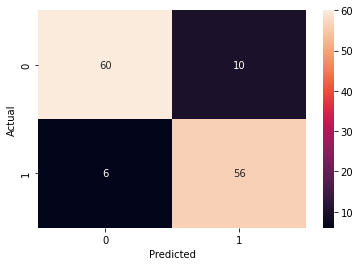

F1 :  

F1 Macro:       0.8786764705882353
F1 Micro:       0.8787878787878788
F1 Weighted:    0.8786764705882353
F1 General:     0.875
F1 Multi_label: [0.88235294 0.875     ]
F1:             0.875
Sensitivity & Specifity:  

Sensitivity :  0.8571428571428571
Specificity :  0.9032258064516129
ROC & AUC:  



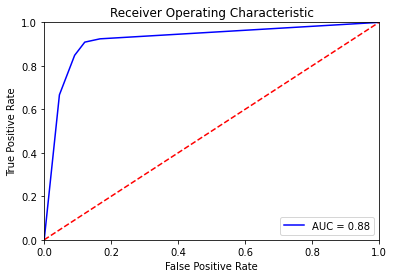

Working...
Finish


In [86]:
#model = CreateModel('TrainingSet.csv', mod = 'subjetive')
Evaluate_TestData('TrainingSet.csv')